In [24]:
import numpy as np
import math
from numpy import linalg as LA
import time
start = time.time()

def load_users_txt():
    'load txt file in a numpy array, which shape is (10000,)'
    users = np.loadtxt("/Users/datamining/Desktop/hw2/Project2-data/users.txt")
    # users.reshape(users.shape[0], 1)
    print(users.shape)
    return users


def get_index_by_userID(userID, users):
    "users is a array which maps index to userID, and the func will find the userID's index ,and return it  "
    "i is starting from 0"
    for i in range(users.shape[0]):
        if users[i] == userID:
            return i
    return None


def load_netflix_train_txt():
    'load netflix_train.txt as a numpy array,which shape is (record_number, 3)'
    record_number = 6897746
    netflix_train = np.zeros((record_number, 3))
    with open("/Users/datamining/Desktop/hw2/Project2-data/netflix_train.txt", "r") as f:
        i=0
        while True:
            lines = f.readline()
            if not lines:
                break
            strs = lines.split()
            netflix_train[i][0] = int(strs[0])
            netflix_train[i][1] = int(strs[1])
            netflix_train[i][2] = int(strs[2])
            i += 1
    return netflix_train


def load_netflix_test_txt():
    'load netflix_train.txt as a numpy array'
    record_number = 1719466
    netflix_test = np.zeros((record_number, 3))
    with open("/Users/datamining/Desktop/hw2/Project2-data/netflix_test.txt", "r") as f:
        i=0
        while True:
            lines = f.readline()
            if not lines:
                break
            strs = lines.split()
            netflix_test[i][0] = int(strs[0])
            netflix_test[i][1] = int(strs[1])
            netflix_test[i][2] = int(strs[2])
            i += 1
    return netflix_test


def generate_matrix_from_train_set():
    score_matrix = np.zeros((10000,10000))
    netflix_train = load_netflix_train_txt()
    print(netflix_train.shape[0])
    users = load_users_txt()
    previous = None
    index = 0
    for i in range(netflix_train.shape[0]):
        userID = netflix_train[i][0]
        if userID != previous:
            index = int(get_index_by_userID(userID, users))
        score_matrix[index][int(netflix_train[i][1]) - 1] = netflix_train[i][2]
        previous = userID
        # print(userID, int(netflix_train[i][1]), netflix_train[i][2])
    return score_matrix

def generate_matrix_from_test_set():
    test_score_matrix = np.zeros((10000,10000))
    netflix_test = load_netflix_test_txt()
    print(netflix_test.shape[0])
    users = load_users_txt()
    previous = None
    index = 0
    for i in range(netflix_test.shape[0]):
        userID = netflix_test[i][0]
        if userID != previous:
            index = int(get_index_by_userID(userID, users))
        test_score_matrix[index][int(netflix_test[i][1]) - 1] = netflix_test[i][2]
        previous = userID
        # print(userID, int(netflix_train[i][1]), netflix_train[i][2])
    return test_score_matrix

## 数据预处理
这是大数据处理的第一步：数据清理


In [25]:
score_matrix = generate_matrix_from_train_set()
test_score_matrix = generate_matrix_from_test_set()
print(score_matrix.shape)
print(test_score_matrix.shape)

6897746
(10000,)
1719466
(10000,)
(10000, 10000)
(10000, 10000)


In [26]:
def cosine_simi_matrix(score_matrix):
    product = np.dot(score_matrix, score_matrix.T)
    norms = np.sqrt(np.diag(product))
    norms = np.mat(norms)
    norms = np.array(norms)
    normProduct = np.dot(norms.T, norms)
    cosine_simi = product/normProduct
    return cosine_simi

cosine_simi = cosine_simi_matrix(score_matrix)
print(cosine_simi)

[[ 1.          0.63751999  0.58911201 ...,  0.23929481  0.23063863
   0.23516932]
 [ 0.63751999  1.          0.62233197 ...,  0.24477994  0.20416094
   0.24026491]
 [ 0.58911201  0.62233197  1.         ...,  0.29733552  0.21028196
   0.25002148]
 ..., 
 [ 0.23929481  0.24477994  0.29733552 ...,  1.          0.26456619
   0.30595259]
 [ 0.23063863  0.20416094  0.21028196 ...,  0.26456619  1.          0.2605375 ]
 [ 0.23516932  0.24026491  0.25002148 ...,  0.30595259  0.2605375   1.        ]]


In [27]:
def get_cosine_similarity(userI, userK, score_matrix):
        score_arrayI = score_matrix[int(userI)][:]
        score_arrayK = score_matrix[int(userK)][:]
        cosine_similarity_matrix[userI][userK] = sum(score_arrayI * score_arrayK)/(LA.norm(score_arrayI) * LA.norm(score_arrayK))
        cosine_similarity_matrix[userK][userI] = cosine_similarity_matrix[userI][userK]
        return cosine_similarity_matrix[userI][userK]


def get_predict_matrix(simi_matrix, score_matrix):
    # predict = simMatrix * train ./ (simMatrix * (train ~= 0)); % 得到预测矩阵
    predict = np.dot(simi_matrix, score_matrix)/np.dot(simi_matrix,(score_matrix != 0))
    return predict


def get_prediction_userI_movieJ(userI, movieJ, score_matrix):
    numerator = 0
    denominator = 0
    for i in range(10000):
        if cosine_simi[userI][i] == 0:
            get_cosine_similarity(userI, i, score_matrix)
        numerator += (cosine_similarity_matrix[userI][i] * score_matrix[i][int(movieJ)])
        denominator += cosine_similarity_matrix[userI][i]
    return numerator/denominator

In [28]:
users = load_users_txt()
predict_matrix = get_predict_matrix(cosine_simi, score_matrix)
#print(get_prediction_userI_movieJ(get_index_by_userID(2123534, users), 6133,score_matrix))
# output 2.40428969373
print(predict_matrix[get_index_by_userID(2123534, users)][6133])
print(predict_matrix)

(10000,)
3.6935892572
[[ 3.51626274  1.58242866  3.27313734 ...,  2.40809926  1.90982144
   2.70421857]
 [ 3.52311321  1.57360078  3.23932313 ...,  2.45400374  1.96022805
   2.70934959]
 [ 3.55291588  1.50422781  3.24868583 ...,  2.42030216  1.94107751
   2.71747659]
 ..., 
 [ 3.58475914  1.65592394  3.33779199 ...,  2.60245256  1.98185317
   2.69487099]
 [ 3.57912145  1.74906026  3.37600014 ...,  2.61060557  1.96656481
   2.64032764]
 [ 3.60659136  1.69346725  3.28059956 ...,  2.64436166  2.03528963
   2.70673942]]


In [29]:
def final_compute_rmse(predict_matrix, test_score_matrix):
    A_test = test_score_matrix != 0
    sparse_A_predict = A_test * predict_matrix
    part1 = LA.norm(sparse_A_predict - test_score_matrix,"fro")
    rmse = np.sqrt(part1*part1/1719466)
    #rmse = (sum((sparseTest - sparsePredict) .^ 2) / length(sparseTest)) ^ 0.5;
    return rmse


def compute_rmse():
    netflix_test = load_netflix_test_txt()
    print(netflix_test.shape)
    square = 0
    for i in range(netflix_test.shape[0]):
        temp = (float(netflix_test[i][2]) - get_prediction_userI_movieJ(get_index_by_userID(int(netflix_test[i][0]), users), int(netflix_test[i][1]),score_matrix))
        # print(temp)
        square += (temp * temp)
    return math.sqrt(square / netflix_test.shape[0])

In [30]:
rmse = final_compute_rmse(predict_matrix, test_score_matrix)
print(rmse)
elapsed = (time.time() - start)
print("elapsed time is:",elapsed)

1.01836903941
elapsed time is: 129.2543728351593


### 基于梯度下降的矩阵分解方法

In [39]:
start = time.time()
def initialize_prameter(k):
    U = 0.01 * np.random.rand(10000, k)
    V = 0.01 * np.random.rand(10000, k)
    return U, V


def compute_cost_function(score_matrix, U, V, lambd, A):
    part1 = LA.norm(A * (score_matrix - np.dot(U, V.T)),"fro")
    part2 = LA.norm(U, "fro")
    part3 = LA.norm(V, "fro")
    cost = part1 * part1 / 2 + lambd * part2 *part2 + lambd * part3 *part3
    # print(cost)
    return cost

import matplotlib.pyplot as plt
def gradient_descent(X, U, V, lambd, learning_rate, A): 
    previous_cost = 0
    # cnt = 0
    list1=[]
    while True:
        list1.append(final_compute_rmse(np.dot(U, V.T), test_score_matrix))
        temp = compute_cost_function(X, U, V, lambd, A)
        print(temp)
        if abs(temp - previous_cost) < 3000:
            break
        previous_cost = temp
        derivative_U = np.dot(A * (np.dot(U, V.T) - X), V) + 2 * lambd * U
        derivative_V = np.dot((A * (np.dot(U, V.T) - X)).T, U) + 2 * lambd * V
        U = U - learning_rate * derivative_U
        V = V - learning_rate * derivative_V
    plt.plot(list1)
    plt.xlabel("iteration numbers")
    plt.ylabel("RMSE")
    plt.title("MF RMSE variation figure(k=50,lambda=0.01)")
    plt.show()
    return np.dot(U, V.T)

In [52]:
A = (score_matrix != 0)
print (A)
U, V = initialize_prameter(20)
print(U)
print(V)

[[ True False  True ...,  True  True  True]
 [ True False  True ...,  True  True  True]
 [False  True False ...,  True  True  True]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
[[  6.62424051e-03   2.55261812e-03   1.11378125e-03 ...,   5.48143132e-03
    8.12073513e-03   9.58991508e-03]
 [  2.82017213e-03   4.46454561e-03   2.55860192e-03 ...,   2.54361255e-03
    1.60381199e-03   8.29399616e-03]
 [  7.55501412e-03   8.01302034e-03   1.21347593e-04 ...,   1.98926830e-03
    7.32650495e-03   6.05586452e-03]
 ..., 
 [  8.97744712e-03   8.03932404e-03   5.84676785e-03 ...,   8.80819432e-03
    5.61425717e-03   4.92604338e-03]
 [  4.59134013e-03   5.84702867e-04   2.77474424e-03 ...,   7.66639087e-03
    2.14119721e-03   5.58964409e-03]
 [  5.89050916e-03   8.35637488e-03   7.60487393e-03 ...,   6.41132352e-05
    4.07992360e-03   8.70915284e-03]]
[[ 0.00460174  0.00217531  0.00299381 ...,  0.00

In [49]:
print(compute_cost_function(score_matrix, U, V, 0.001, A))

43727346.5119


43744898.2945
43725066.2983
43681767.2894
43581310.2061
43347335.2363
42806058.0869
41576670.07
38903382.0286
33644851.134
25356549.7746
16944041.202
12275450.8627
9899616.97821
8379672.12324
7346629.97643
6609049.08599
6061132.94784
5640930.79114
5310090.45351
5043771.54539
4825291.56895
4643104.80414
4489011.97606
4357057.47617
4242828.02382
4142994.1817
4055003.27635
3976869.23548
3907025.94062
3844223.09625
3787451.10935
3735886.11119
3688849.18733
3645775.77507
3606192.43334
3569699.02279
3535954.90029
3504668.12296
3475586.93013
3448492.96498
3423195.83658
3399528.72304
3377344.78982
3356514.25116
3336921.94292
3318465.30459
3301052.69144
3284601.95445
3269039.23908
3254297.96393
3240317.94811
3227044.66226
3214428.58301
3202424.63434
3190991.70231
3180092.21201
3169691.75764
3159758.77787
3150264.27025
3141181.53914
3132485.97276
3124154.84539
3116167.14158
3108503.39947
3101145.57086
3094076.89604
3087281.79154
3080745.74927
3074455.24576
3068397.66038
3062561.20138
3056934.839

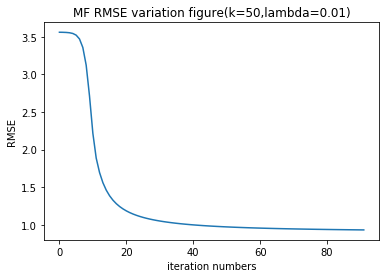

In [57]:
prediction_matrix = gradient_descent(score_matrix, U, V, 0.01, 0.0001, A)
#rmse = final_compute_rmse(prediction_matrix, test_score_matrix)
#print(rmse)

In [58]:
mf_rmse = final_compute_rmse(prediction_matrix, test_score_matrix)
print(mf_rmse)
elapsed = (time.time()-start)
print("elapsed time is:", elapsed)

0.93204399725
elapsed time is: 11864.774064779282
